# Pandas Exercises
Here you can test your comprehension of the Pandas introductory material. Most questions will be code, but a couple will be multiple-choice or fill-in-the-blank type questions. As with most coding packages, it is more important that you understand enough to know what to look for if you get stuck than it is to actually memorize all the methods, attributes, and syntax. You are welcome to consult my overview and/or the [official documentation](https://pandas.pydata.org/docs/user_guide/10min.html) whenever you need to.

I did try to keep these in order of the lecture material, but I rearranged some of the lecture sections several times and they don't divide up very neatly with a semi-realistic workflow. Just do what you can figure out how to do with the time you have, bring your questions to the exercise sessions, and if you've come to something I haven't covered yet, I or the other TAs will let you know to wait until after the next lecture.

### Basics

1. **Start by importing Pandas and NumPy** (to make sure you have the right modules loaded):

In [5]:
import pandas as pd
import numpy as np


2. **Use the NumPy array $a$ in the following cell to create a Series $ser$ with indexes labeled 1-10.**

In [9]:
a = np.linspace(0,2*np.pi,10)
ser = pd.Series(a, index=np.arange(1,11))
print(ser)

1     0.000000
2     0.698132
3     1.396263
4     2.094395
5     2.792527
6     3.490659
7     4.188790
8     4.886922
9     5.585054
10    6.283185
dtype: float64


3. **Initialize an integer DataFrame based on the XKCD comic below. Label and align the rows and columns such that the printed DataFrame has the same orientation as the figure. Use `1` to represent situations where the tool listed on the left is appropriate (green squares, or lighter squares if you're red-green colorblind) and `0` for situations where the tool is not helpful (red or darker squares).** If you're feeling creative, you can also insert `-1` for situations where you think the tool to bring will actively make the problem worse.

    ![](https://imgs.xkcd.com/comics/what_to_bring.png)
    

In [8]:
df = pd.DataFrame(np.identity(4, dtype=int),
                  columns = ['knife_fight', 'gun_fight', 'wood_fire', 'oil_fire'],
                  index = ['knife', 'gun', 'water', 'lid'])
df.loc['gun','knife_fight'] = 1
df.loc['knife','gun_fight'] = -1
df.loc['gun',['wood_fire','oil_fire']] = -1
df.loc['water','oil_fire'] = -1
print(df)

       knife_fight  gun_fight  wood_fire  oil_fire
knife            1         -1          0         0
gun              1          1         -1        -1
water            0          0          1        -1
lid              0          0          0         1


4. **Now we're going to expand the whole table by 1 row and 1 column:**

    a. First, the easy part: add the column 'electrical_fire'. Now, where there are electrical fires, there are typically live wires that pose an electrocution hazard. All of the tools present on the table can only increase your risk of electrocution, so feel free to fill the column with -1.
    
    b. Next is the slightly trickier part: add a row with index label 'CO2', as in CO2 extinguisher. In this row, all the columns containing 'fire' should contain 1's. The columns containing 'fight' could contain either 0's or 1's depending on how you feel about your odds of escaping in the cloud of CO2 and condensation. Remember that you can use array slice notation in .iloc[], and in .loc[] as long as you don't put strings directly on either side of the colon (:). 

In [10]:
# a.
df['electrical_fire'] = -1*np.ones(4, dtype=int)
print(df)

       knife_fight  gun_fight  wood_fire  oil_fire  electrical_fire
knife            1         -1          0         0               -1
gun              1          1         -1        -1               -1
water            0          0          1        -1               -1
lid              0          0          0         1               -1


In [11]:
# b.
df.loc['CO2', :] = [0,0,1,1,1]
print(df.astype(int))

       knife_fight  gun_fight  wood_fire  oil_fire  electrical_fire
knife            1         -1          0         0               -1
gun              1          1         -1        -1               -1
water            0          0          1        -1               -1
lid              0          0          0         1               -1
CO2              0          0          1         1                1


5. **Which one of the following selection syntaxes should NOT be used for a DataFrame `df` with columns labeled 'A' through 'D' and rows indexed 0 through 4?** (Hint: "should NOT be used" does not necessarily mean such input would always raise an error - in fact the problem is that it may fail to raise an exception when you need it to.)
   
    a. `df.loc[df.index < 3, 'A']`

    **b. `df.iloc[2]['B']` <-- this one**

    c. `df.iloc[3,1]`

    d. `df['D']`

### Loading and Inspecting Real Data

6. **Load the file `covid19_italy_region.csv` into a DataFrame called `it_covid19`. Use the appropriate kwargs to set the leftmost column as the row indexes.** You may refer to official documentation on file readers as needed.

In [40]:
it_covid19 = pd.read_csv('covid19_italy_region.csv', index_col=0)

7. **Inspect `it_covid19` by printing the following (hint: each prompt requires a different 1-word command):**
   
    a. The first 5 rows of the DataFrame
   
    b. A table listing the column names and the number of non-null entries in each column

    c. The number of unique values in each column

    d. A table of summary statistics for the numeric columns (mean, standard deviation, min, max, etc.). Bonus challenge: if you can figure out how to exclude columns of dates, region codes, and coordinates, that will make the output easier to read.

In [16]:
#a. first 5 rows
it_covid19.head()

,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
SNo,,,,,,,,,,,,,,,,
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [17]:
#b. table of column names and non-null entries per column
it_covid19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6027 entries, 0 to 6026
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       6027 non-null   object 
 1   Country                    6027 non-null   object 
 2   RegionCode                 6027 non-null   int64  
 3   RegionName                 6027 non-null   object 
 4   Latitude                   6027 non-null   float64
 5   Longitude                  6027 non-null   float64
 6   HospitalizedPatients       6027 non-null   int64  
 7   IntensiveCarePatients      6027 non-null   int64  
 8   TotalHospitalizedPatients  6027 non-null   int64  
 9   HomeConfinement            6027 non-null   int64  
 10  CurrentPositiveCases       6027 non-null   int64  
 11  NewPositiveCases           6027 non-null   int64  
 12  Recovered                  6027 non-null   int64  
 13  Deaths                     6027 non-null   int64  
 1

In [18]:
#c. number of unique values per column
it_covid19.nunique()

Date                          287
Country                         1
RegionCode                     21
RegionName                     21
Latitude                       21
Longitude                      21
HospitalizedPatients         1451
IntensiveCarePatients         462
TotalHospitalizedPatients    1515
HomeConfinement              3211
CurrentPositiveCases         3358
NewPositiveCases             1086
Recovered                    4128
Deaths                       1998
TotalPositiveCases           4644
TestsPerformed               4835
dtype: int64

In [19]:
#d. table of summary statistics
it_covid19[it_covid19.columns[6:]].describe()

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.00000,4.872000e+03
mean,509.093579,55.892318,564.985897,5722.911399,6287.897296,286.885847,9337.852829,1474.370665,17100.12361,2.600810e+05
std,1272.731157,134.957979,1403.362341,15892.768789,16804.884786,818.450458,20551.265039,3365.190225,36934.67627,3.339818e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,-229.000000,0.000000,0.000000,0.00000,3.482000e+03
25%,16.000000,1.000000,17.000000,139.000000,168.000000,4.000000,734.000000,98.000000,1383.50000,6.507375e+04
50%,93.000000,9.000000,106.000000,743.000000,905.000000,31.000000,2840.000000,389.000000,4613.00000,1.365560e+05
75%,384.500000,46.000000,434.000000,3057.000000,3735.000000,159.500000,8450.500000,1102.500000,15304.00000,3.043542e+05
max,12077.000000,1381.000000,13328.000000,155066.000000,164406.000000,11489.000000,289706.000000,23024.000000,429109.00000,2.415099e+06



8. As you can see from the previous question, there is only 1 value in the `Country` column, and you can safely assume the `RegionCode`, `RegionName`, `Latitude`, and `Longitude` columns are degenerate. **Drop the `Country`, `RegionCode`, `Latitude`, and `Longitude` columns from `it_covid19`, all in-place, but keep the `RegionName` column.** Make sure you specify the right axis when you drop!

In [42]:
#8.
it_covid19.drop(['Country', 'RegionCode', 'Latitude','Longitude'], axis=1, inplace=True)

In [44]:
#print tail to check
it_covid19.tail()

,Date,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
SNo,,,,,,,,,,,,
6022,2020-12-06T17:00:00,Sicilia,1367,213,1580,38166,39746,1022,29984,1759,71489,692062.0
6023,2020-12-06T17:00:00,Toscana,1360,252,1612,27587,29199,753,76331,2867,108397,983103.0
6024,2020-12-06T17:00:00,Umbria,332,60,392,5673,6065,234,18619,460,25144,231538.0
6025,2020-12-06T17:00:00,Valle d'Aosta,102,8,110,877,987,34,5406,333,6726,34644.0
6026,2020-12-06T17:00:00,Veneto,2508,308,2816,73988,76804,3444,84235,4210,165249,1090932.0


### Joining and Merging
Let's take a quick break from COVID19 data to practice some joining and merging. I'll initialized a couple of DataFrames for you (Easter Egg: look up "porters lake this street"):

In [19]:
demo1 = pd.DataFrame([['Ali', '6 This St', 'Porters Lake', 8675309],
                      ['Erin', '48 That St', 'Porters Lake', 2244667],
                      ['Rick', '19 The Other St', 'Porters Lake', 1234567],
                      ['Summer', '55 Post Office Rd', 'Porters Lake', 8772274]],
                      columns = ['name','addr', 'city', 'tele'])
demo2 = pd.DataFrame([['Ali', 'veterinarian', 'Porters Lake'],
                      ['Erin', 'lawyer', 'Porters Lake'],
                      ['Summer', 'mail carrier', 'Porters Lake'],
                      ['Larry', 'programmer', 'Mineville'],
                      ['Moe', 'grocer', 'Mineville']],
                      columns = ['name', 'job','city'])

9. **Combine the 2 DataFrames above in the following ways:**

   a. Print the result of an *inner* merge. Use the `on` kwarg to eliminate duplicates of `'name'` and `'city'`.
   
   b. Once you have a working version of part *a*, change `'inner'` to `'outer'` and see what happens.

   c. Use `.combine_first()` to reproduce the results of the outer merge from part *b*. The results don't have to be in the same order, but you could use `.reindex()` to get the original column order back.

In [26]:
#a. & b.
print(demo1.merge(demo2, on=['name','city'], how='outer'))

     name               addr          city       tele           job
0     Ali          6 This St  Porters Lake  8675309.0  veterinarian
1    Erin         48 That St  Porters Lake  2244667.0        lawyer
2   Larry                NaN     Mineville        NaN    programmer
3     Moe                NaN     Mineville        NaN        grocer
4    Rick    19 The Other St  Porters Lake  1234567.0           NaN
5  Summer  55 Post Office Rd  Porters Lake  8772274.0  mail carrier


In [21]:
#c.
print(demo1.combine_first(demo2).reindex(columns=list(demo1.columns.values)+['job']))

     name               addr          city       tele           job
0     Ali          6 This St  Porters Lake  8675309.0  veterinarian
1    Erin         48 That St  Porters Lake  2244667.0        lawyer
2    Rick    19 The Other St  Porters Lake  1234567.0  mail carrier
3  Summer  55 Post Office Rd  Porters Lake  8772274.0    programmer
4     Moe                NaN     Mineville        NaN        grocer


### Functions and GroupBy Methods with Real Data

The DataFrame from questions 6-8 just lists raw counts of COVID19 by Italian administrative region, but for epidemiology, it's usually more helpful to have counts *per capita*.

10. To start you off with something easy, **the cumulative number of cases in Italy as of the last date in the `it_covid19` DataFrame, 2020-12-06, was 1,747,712** (or 1.747.712 if you're used to decimal thousands separators). **Compute a running percentage of the year's national total in each region by dividing the `TotalPositiveCases` column by the national total for the year, and multiplying that result by 100. Store the result in a column called `RunPctTot` or some other indicative title.**

In [30]:
#10.
it_covid19['RunPctTot'] = it_covid19['TotalPositiveCases']*100/1747712

11. **Group `it_covid19` by `'RegionName'`, and check the maximum values of the `'RunPctTot'` column** (which will also be the last value for each region in the year because `TotalPositiveCases` was cumulative). **Which region accounted for the largest percentage of cases in the country?**

In [32]:
#11.
grp_it_covid19=it_covid19.groupby('RegionName')
print(grp_it_covid19['RunPctTot'].max())

RegionName
Abruzzo                   1.732208
Basilicata                0.511526
Calabria                  1.060644
Campania                  9.457680
Emilia-Romagna            7.653492
Friuli Venezia Giulia     2.029339
Lazio                     7.452887
Liguria                   3.077109
Lombardia                24.552615
Marche                    1.853452
Molise                    0.302453
P.A. Bolzano              1.451097
P.A. Trento               0.978594
Piemonte                 10.172614
Puglia                    3.681442
Sardegna                  1.383866
Sicilia                   4.090434
Toscana                   6.202223
Umbria                    1.438681
Valle d'Aosta             0.384846
Veneto                    9.455162
Name: RunPctTot, dtype: float64


For the next few exercises, I have provided a tab-separated text table of the regions of Italy, their March 2020 populations (except P. A. Trento and Bolzano, whose numbers are from 2021), and population densities. Getting time-resolved population data was more trouble than these exercises warrant, so this won't be very scientific, but you will get some (more) experience with the `groupby()`, `compare()`, and `apply()` methods.
 
12. **Load the file `'ita_pop_by_reg.txt'` with `read_csv()` (note that the delimiters in this text file are tabs, not commas) into a variable called `it_pop`.** Don't set anything as the Index yet. **Then, get the unique values of the `'RegionName'` column of the `it_covid19` DataFrame, convert them to a Series, and `compare` them to the Region column of the table you just loaded** (this whole sentence's worth of instructions can be done in one line). **Are they identical?**

In [34]:
#12-a.
#it_covid19['RegionName'].unique()
it_pop = pd.read_csv('ita_pop_by_reg.txt', sep='\t')
print(it_pop)

                   Region  2020_mar_pop  pop_density_sq_km
0                 Abruzzo       1292126                118
1              Basilicata        552084                 54
2                Calabria       1890094                121
3                Campania       5704571                409
4          Emilia-Romagna       4464643                197
5   Friuli-Venezia Giulia       1204970                151
6                   Lazio       5750888                332
7                 Liguria       1523084                278
8               Lombardia      10026900                418
9                  Marche       1510898                158
10                 Molise        299563                 65
11          P. A. Bolzano        531178                 72
12           P. A. Trento        541098                 87
13               Piemonte       4308215                168
14                 Puglia       3947623                200
15               Sardegna       1609313                 

In [35]:
#12-b.
print(it_pop['Region'].compare(pd.Series(it_covid19['RegionName'].unique())))

                     self                  other
5   Friuli-Venezia Giulia  Friuli Venezia Giulia
11          P. A. Bolzano           P.A. Bolzano
12           P. A. Trento            P.A. Trento


13. As you probably just saw, there are some annoyingly subtle differences in spacing and/or punctuation between the names of 3 of the regions in each DataFrame. **Use string vectorization to `replace` the relevant cells in your choice of one or the other DataFrame. Then rerun the `compare()` command above and make sure it comes back empty.** (Hint: there's a reason I typeset "replace" as code.)

In [37]:
#13.
it_covid19['RegionName']=it_covid19['RegionName'].str.replace('Friuli Venezia Giulia',
                                                              'Friuli-Venezia Giulia'
                                                             ).str.replace('P.A.', 'P. A.')
print(it_pop['Region'].compare(pd.Series(it_covid19['RegionName'].unique())))

Empty DataFrame
Columns: [self, other]
Index: []


14. **Use `.div()` (or `.rdiv()`) and `.mul()` to compute the percentage of `'TotalPositiveCases'` that are `'Recovered'` in a region at any one time, and assign the result to a column called `'RecoveredPct'`.** For now, use the original `it_covid19` DataFrame, not the GroupBy object.

In [39]:
#14
it_covid19['RecoveryPct']=it_covid19['TotalPositiveCases'].rdiv(it_covid19['Recovered']).mul(100.)
print(it_covid19['RecoveryPct'].tail())

SNo
6022    41.942117
6023    70.418000
6024    74.049475
6025    80.374665
6026    50.974590
Name: RecoveryPct, dtype: float64


15. **Using the `.apply()` function on the `it_covid19` DataFrame, divide the `'TotalPositiveCases'` column by the region's population to get an unadjusted cumulative per capita infection rate converted to a percentage. Set the result equal to a new column of DataFrame `it_covid19`, labelled `'TotCasesPct'` or something similarly informative.** You'll get to how you do this with the GroupBy object in a moment. Since this is a difficult problem for new users, I'll help you break it down a little:
    
    a. Start by setting the Region column of `it_pop` as the index of that DataFrame.
    
    b.  Define a function that **1)** takes in a row from a DataFrame (`it_covid19` in this case), **2)** extracts the value in the `'Region'` column, **3)** looks up the population in `it_pop` by this region, and **4)** returns the `'TotalPositiveCases'` entry divided by this population and then multiplied by 100.

    c.  Define the new column as the original DataFrame with the function applied to it. [Consult the documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to figure out which axis to apply the function to.

In [41]:
#15-a.
it_pop.set_index('Region', inplace=True)

In [42]:
#15-b.
def per_cap(row):
    pop=it_pop.loc[row['RegionName'],'2020_mar_pop']
    return (row['TotalPositiveCases']/pop)*100.

In [43]:
#15-c.
it_covid19['TotCasesPct'] = it_covid19.apply(per_cap,axis=1)
print(it_covid19['TotCasesPct'] )

SNo
0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000403
          ...   
6022    1.469001
6023    2.937915
6024    2.892878
6025    5.388128
6026    3.388944
Name: TotCasesPct, Length: 6027, dtype: float64


16. **Now reformulate your solution to the previous problem to apply it to GroupBy object you made in problem 11. We will again use `.apply()` because the way `.transform()` receives GroupBy objects is incompatible with what we want to do** (I learned this the hard way). I'll have you fill in the blanks rather than write from scratch since it's even less intuitive. It's important that you have already set the Region as the index of the `it_pop` DataFrame.

In [45]:
#16-a.
def grp_per_cap(group):
    reg = group['RegionName'].iloc[0]
    #index doesn't matter, all values are the same for a given group
    pop=it_pop.loc[reg,'2020_mar_pop']
    return (group['TotalPositiveCases']/pop)*100.

In [98]:
#16-b #
gptrans = grp_it_covid19[['RegionName', 'TotalPositiveCases']].apply(grp_per_cap)
gptrans

RegionName  SNo 
Abruzzo     0       0.000000
            21      0.000000
            42      0.000000
            63      0.000077
            84      0.000077
                      ...   
Veneto      5942    3.094858
            5963    3.168297
            5984    3.244341
            6005    3.318314
            6026    3.388944
Name: TotalPositiveCases, Length: 6027, dtype: float64

### Plotting
17. Let's take a closer look at Lombardia since it's the most populous region. We'll use it to make a couple of plots. **Get the Lombardia group from `grp_it_covid19` and**
    
    a. **Make a simple line plot of the `'NewPositiveCases'` column.** You can let the x-axis stay as the SNo, or use the Date column, but if you do the latter you'll have to convert the dates to datetime format in the original DataFrame and then redo the grouping or else the dates will be unreadable (see problem 18).

    b. **Make an area plot with `'TotalPositiveCases'`, `'Recovered'`, and `'Deaths'`, in that order, using [the documentation on the area() function as a guide](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html#pandas.DataFrame.plot.area)** (remember that you can pass multiple columns to the `y` kwarg). **Turn the stacking off.**

<Axes: xlabel='SNo'>

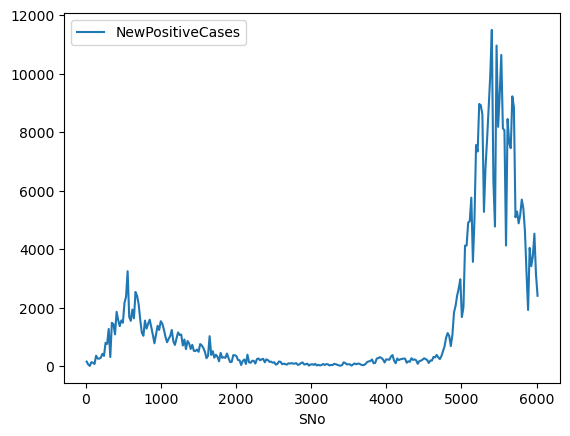

In [48]:
#17-a.
grp_it_covid19.get_group('Lombardia').plot(y='NewPositiveCases')

<Axes: xlabel='SNo'>

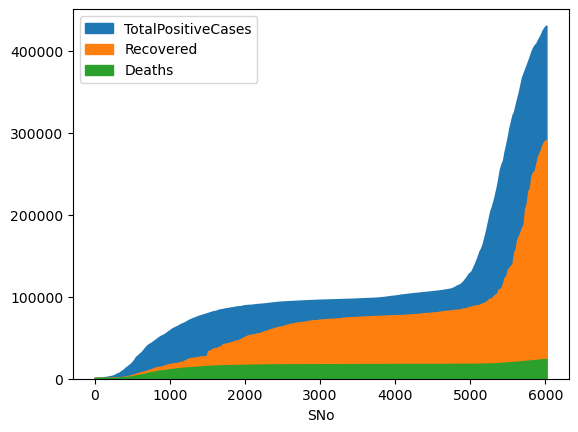

In [49]:
grp_it_covid19.get_group('Lombardia').plot(kind='area', y=['TotalPositiveCases','Recovered', 'Deaths'],
                                          stacked=False, alpha=1)

### Time Series (Do if time)

18. **Convert the `Date` column of it_covid19 to datetime format.** If you print it, you will see that it assigns a time of `17:00:00` to every date. Don't worry about that; it's an artefact of Pandas originally being developed by and for economists.

In [51]:
#18.
it_covid19['Date'] = pd.to_datetime(it_covid19['Date'])

In [52]:
print(it_covid19.tail())

                    Date     RegionName  HospitalizedPatients  \
SNo                                                             
6022 2020-12-06 17:00:00        Sicilia                  1367   
6023 2020-12-06 17:00:00        Toscana                  1360   
6024 2020-12-06 17:00:00         Umbria                   332   
6025 2020-12-06 17:00:00  Valle d'Aosta                   102   
6026 2020-12-06 17:00:00         Veneto                  2508   

      IntensiveCarePatients  TotalHospitalizedPatients  HomeConfinement  \
SNo                                                                       
6022                    213                       1580            38166   
6023                    252                       1612            27587   
6024                     60                        392             5673   
6025                      8                        110              877   
6026                    308                       2816            73988   

      CurrentPosit

19. Now let's do some resampling.
    
   a. **To prepare, set the grouping of `it_covid19` on the `'RegionName'` column, get Lombardia again, and assign it to a new DataFrame with the `'Date'` column set as the index.**
   
   b. **Resample the `'NewPositiveCases'` column to weeks (`'W'`) and compute the weekly totals with the correct aggregate function.** Feel free to plot the results and see how much nicer the x axis looks with formatted datetimes.

In [54]:
#19-a.
grp_it_covid19=it_covid19.groupby('RegionName')
lombardia_covid19 = grp_it_covid19.get_group('Lombardia').set_index('Date')

In [55]:
#19-b.
npc_resam=lombardia_covid19['NewPositiveCases'].resample('W').sum()

<Axes: xlabel='Date'>

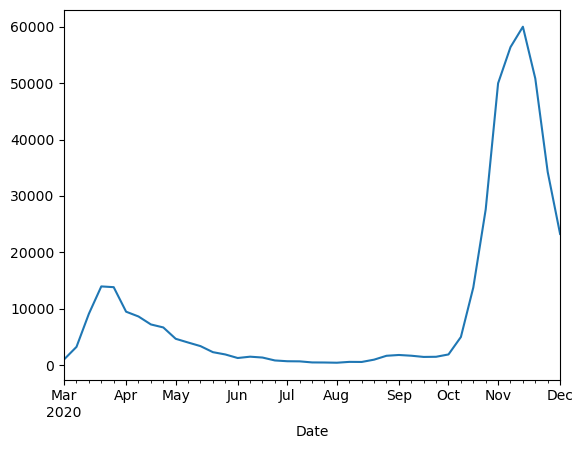

In [56]:
npc_resam.plot()

### BONUS: Categorical data and memory usage. 
20. **Compute the memory usage of the it_covid19 DataFrame's `'RegionName'` column before and after converting it to `Categorical` type.**

In [58]:
it_covid19['RegionName'].memory_usage(deep=True)

445424

In [59]:
it_covid19['RegionName'].astype('category').memory_usage(deep=True)

56183